## Библиотеки для работы с временными рядами

In [8]:
# Основные библиотеки
import sktime
import etna
import statsmodels.api as sm
import sklearn

# Визуализация
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

#Остальное
import numpy as np
import pandas as pd
import datetime

## Временные ряды бывают разными

In [47]:
from sktime.datasets import load_airline
y = load_airline()
px.line(x = y.index.to_timestamp(), y=y.values, height =350).show()
print(y.index[:4])

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04'], dtype='period[M]', name='Period')


In [48]:
from sktime.datasets import load_longley
y, X = load_longley()
px.line(x = y.index.to_timestamp(), y=y.values, height =350).show()
y.index[:4]

PeriodIndex(['1947', '1948', '1949', '1950'], dtype='period[A-DEC]', name='Period')

In [46]:
from sktime.datasets import load_solar  
y = load_solar()
px.line(y).show()
print(y.index[:4])

DatetimeIndex(['2021-05-01 00:00:00+00:00', '2021-05-01 00:30:00+00:00',
               '2021-05-01 01:00:00+00:00', '2021-05-01 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime_gmt', freq='30T')


In [146]:
df = pd.read_csv('../data/traffic.csv', parse_dates=['report_dt'])

In [149]:
px.line(df, x='report_dt', y ='traffic', color='cross')

In [120]:
df_daily = df.groupby([pd.Grouper(key='report_dt', freq='D'), 'cross'])['traffic'].sum().reset_index()
px.line(df_daily, x='report_dt', y ='traffic', color='cross')

In [134]:
y_traffic = df[df.cross==1].resample('D', on='report_dt').sum()['traffic']

In [135]:
px.line(traffic,height=400)

In [138]:
y_longley, X_longley = load_longley()
y_air = load_airline()
y_traffic

report_dt
2015-11-01     327
2015-11-02     546
2015-11-03     544
2015-11-04     498
2015-11-05     464
              ... 
2017-06-26    1774
2017-06-27    2187
2017-06-28    2080
2017-06-29    2086
2017-06-30    1883
Freq: D, Name: traffic, Length: 608, dtype: int64

13 3


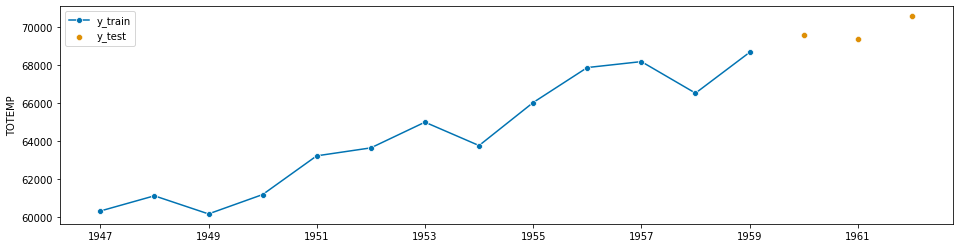

In [153]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y_longley_train, y_longley_test = temporal_train_test_split(y_longley, test_size=3)
plot_series(y_longley_train, y_longley_test, labels=["y_train", "y_test"])
print(y_longley_train.shape[0], y_longley_test.shape[0])

132 12


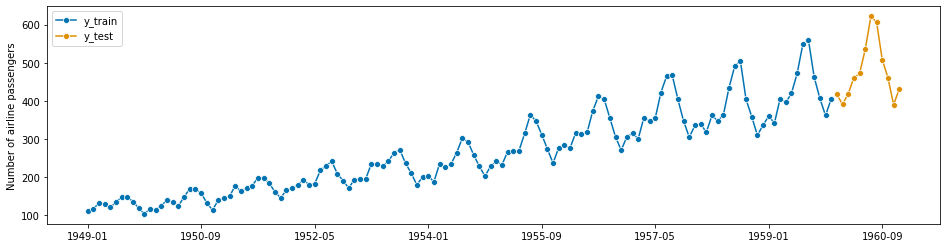

In [142]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y_air_train, y_air_test = temporal_train_test_split(y_air, test_size=12)
plot_series(y_air_train, y_air_test, labels=["y_train", "y_test"])
print(y_air_train.shape[0], y_air_test.shape[0])

548 60


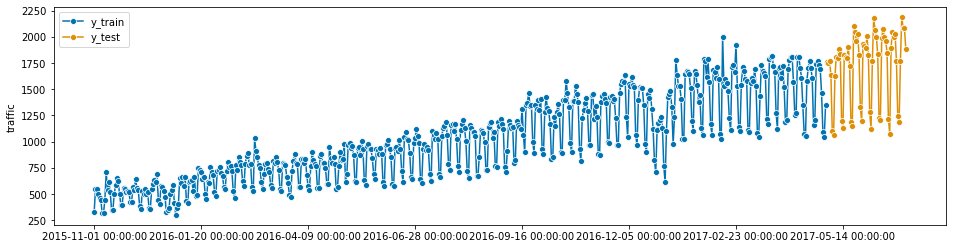

In [145]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y_traffic_train, y_traffic_test = temporal_train_test_split(y_traffic, test_size=60)
plot_series(y_traffic_train, y_traffic_test, labels=["y_train", "y_test"])
print(y_traffic_train.shape[0], y_traffic_test.shape[0])


- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error), интерпретируемая метрика, измеряется в тех же единицах, что и исходный ряд, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error), также интерпретируемая метрика, однако её преимущество - нечувствительность (робастность) к выбросам в данных, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), используется в большинстве случаев, сильнее наказывает модель за большие ошибки и меньше - за маленькие (парабола), $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error), практически тоже самое, но значения предварительно логарифмируются, таким образом маленьким ошибкам также уделяется значительное внимание, обычно используется, если данным присущ экспоненциальный рост, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error, как MAE, только в процентах, - удобно для объяснения заказчику качества прогноза, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
---
- [Mean absolute scaled error](https://en.wikipedia.org/wiki/Mean_absolute_scaled_error), аналог $R^2$ для временных рядов. Тоже сравнивает прогноз по вашей модели с наивным и говорит насколько он оказался лучше.

## Обучение простых моделей

In [174]:
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

MAPE: 0.01656386931275494


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='TOTEMP'>)

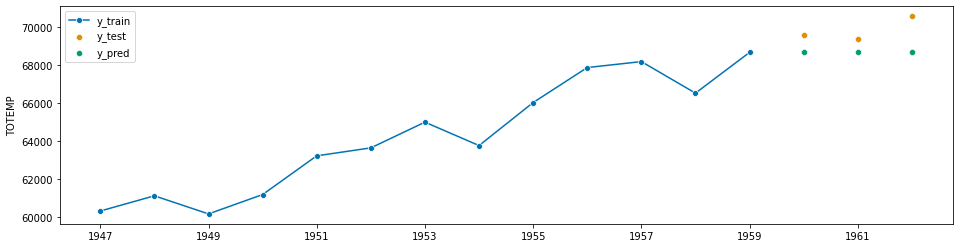

In [175]:
forecaster = NaiveForecaster(strategy="last",sp=1)
forecaster.fit(y_longley_train)
y_pred = forecaster.predict(y_longley_test.index)
print('MAPE:',mean_absolute_percentage_error(y_longley_test, y_pred))
plot_series(y_longley_train, y_longley_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.09987532920823484
MAE: 47.833333333333336


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

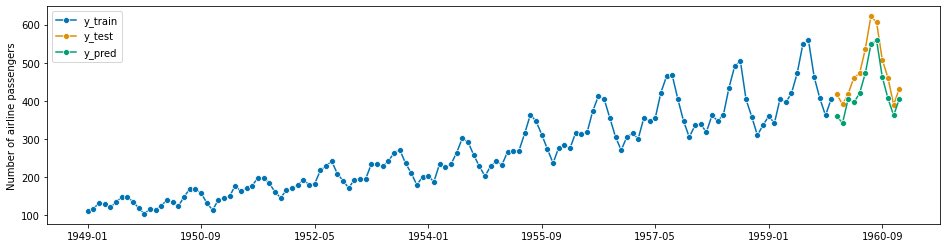

In [176]:
forecaster = NaiveForecaster(strategy="last",sp=12)
forecaster.fit(y_air_train)
y_pred = forecaster.predict(y_air_test.index)
print('MAPE:',mean_absolute_percentage_error(y_air_test, y_pred))
print('MAE:',mean_absolute_error(y_air_test, y_pred))
plot_series(y_air_train, y_air_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.12232998765847095
MAE: 215.6


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

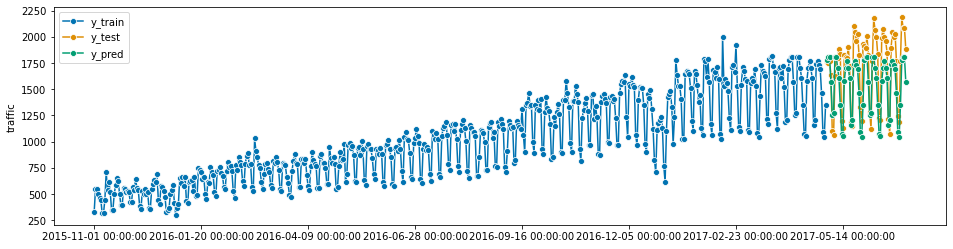

In [236]:
forecaster = NaiveForecaster(strategy="last",sp=28)
forecaster.fit(y_traffic_train)
y_pred = forecaster.predict(y_traffic_test.index)
print('MAPE:',mean_absolute_percentage_error(y_traffic_test, y_pred))
print('MAE:',mean_absolute_error(y_traffic_test, y_pred))
plot_series(y_traffic_train, y_traffic_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.13967804750251203
MAE: 251.48333333333332


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

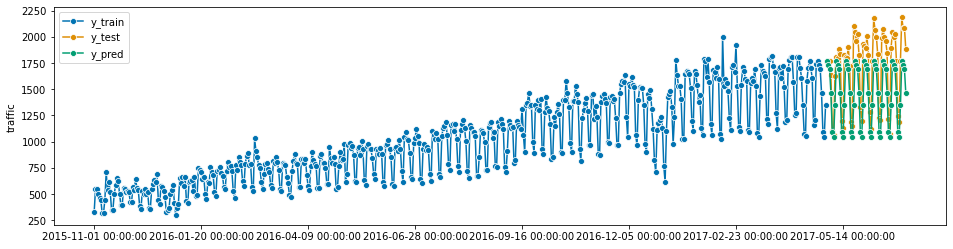

In [181]:
forecaster = NaiveForecaster(strategy="last",sp=7)
forecaster.fit(y_traffic_train)
y_pred = forecaster.predict(y_traffic_test.index)
print('MAPE:',mean_absolute_percentage_error(y_traffic_test, y_pred))
print('MAE:',mean_absolute_error(y_traffic_test, y_pred))
plot_series(y_traffic_train, y_traffic_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.2246083188613694
MAE: 377.43444444444447


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

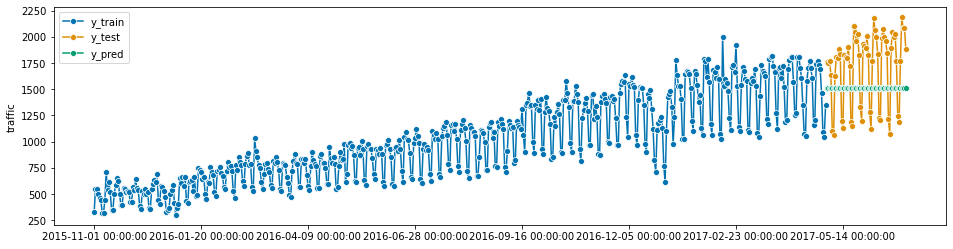

In [178]:
forecaster = NaiveForecaster(strategy="mean",window_length=30)
forecaster.fit(y_traffic_train)
y_pred = forecaster.predict(y_traffic_test.index)
print('MAPE:',mean_absolute_percentage_error(y_traffic_test, y_pred))
print('MAE:',mean_absolute_error(y_traffic_test, y_pred))
plot_series(y_traffic_train, y_traffic_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.22828453633898502
MAE: 386.6499999999999


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

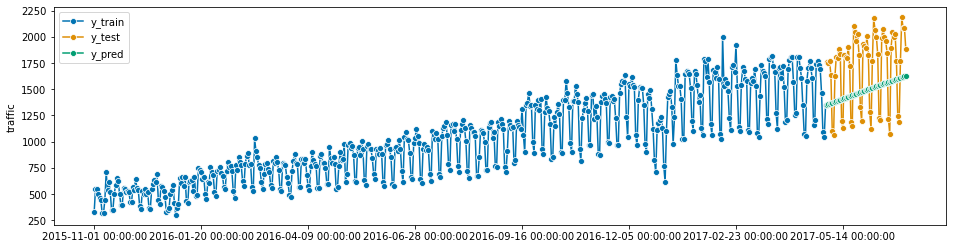

In [268]:
# Почему 30??? - непонятно
forecaster = NaiveForecaster(strategy="drift", window_length=30)
forecaster.fit(y_traffic_train)
y_pred = forecaster.predict(y_traffic_test.index)
print('MAPE:',mean_absolute_percentage_error(y_traffic_test, y_pred))
print('MAE:',mean_absolute_error(y_traffic_test, y_pred))
plot_series(y_traffic_train, y_traffic_test, y_pred, labels=["y_train", "y_test", "y_pred"])

MAPE: 0.07877919733166523
MAE: 126.86206896551724


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

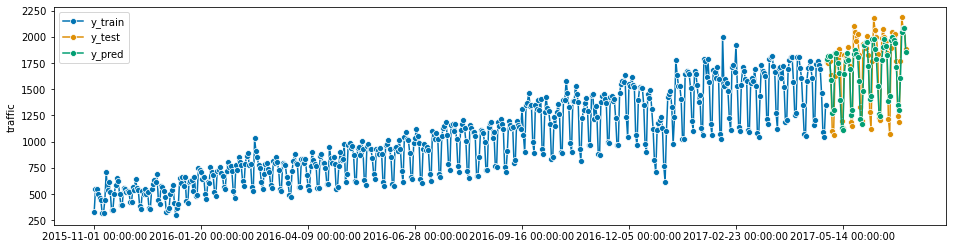

In [263]:
forecaster1 = NaiveForecaster(strategy="last",sp=28)
forecaster2 = NaiveForecaster(strategy="drift", window_length=30)
forecaster1.fit(y_traffic_train)
forecaster2.fit(y_traffic_train)
y_pred = forecaster1.predict(y_traffic_test.index) + (forecaster2.predict(y_traffic_test.index) - y_traffic_train[-1])
print('MAPE:',mean_absolute_percentage_error(y_traffic_test, y_pred))
print('MAE:',mean_absolute_error(y_traffic_test, y_pred))
plot_series(y_traffic_train, y_traffic_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# Кросс-Валидация на временных рядах

In [331]:
def plot_cv_indices(cv, y, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    fig, ax = plt.subplots(figsize = (16,6))
    n_splits = 0
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(y))
        indices[tt] = 1
        indices[tr] = 0
        cmap_cv = plt.cm.coolwarm
        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )
        n_splits +=1
        
    ax.set(
    yticks=np.arange(n_splits) + 0.5,
    yticklabels=np.arange(n_splits),
    xlabel="Sample index",
    ylabel="CV iteration",
    ylim=[n_splits, -0.2],
    )

In [332]:
print(y_longley.shape)

(16,)


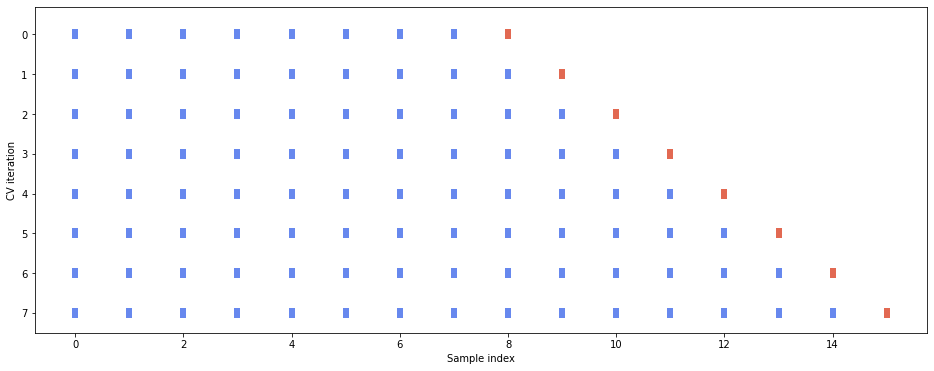

In [333]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
cv = ExpandingWindowSplitter(initial_window = 8)
plot_cv_indices(cv, y_longley)

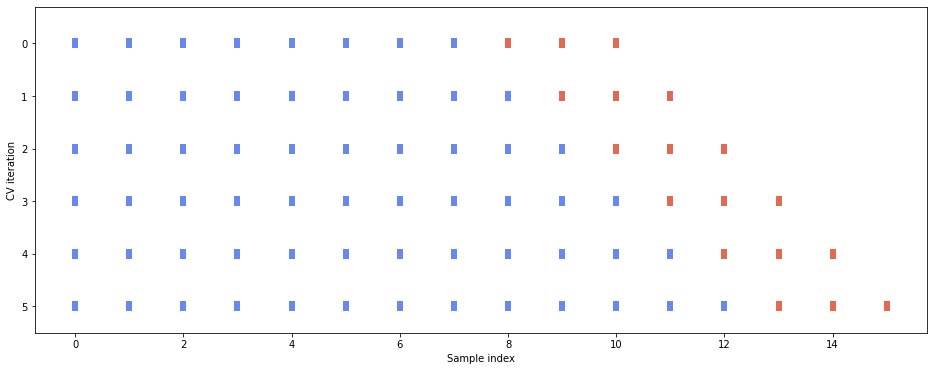

In [335]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
cv = ExpandingWindowSplitter(initial_window = 8,fh=[1,2,3])
plot_cv_indices(cv, y_longley)

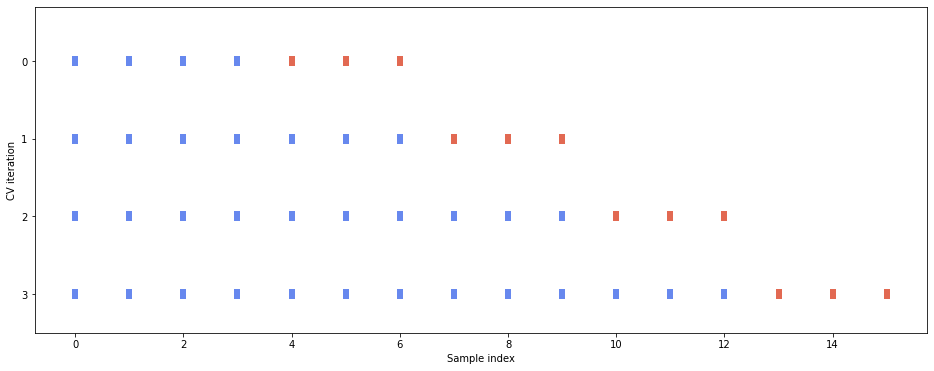

In [339]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
cv = ExpandingWindowSplitter(initial_window = 4,fh=[1,2,3], step_length=3)
plot_cv_indices(cv, y_longley)

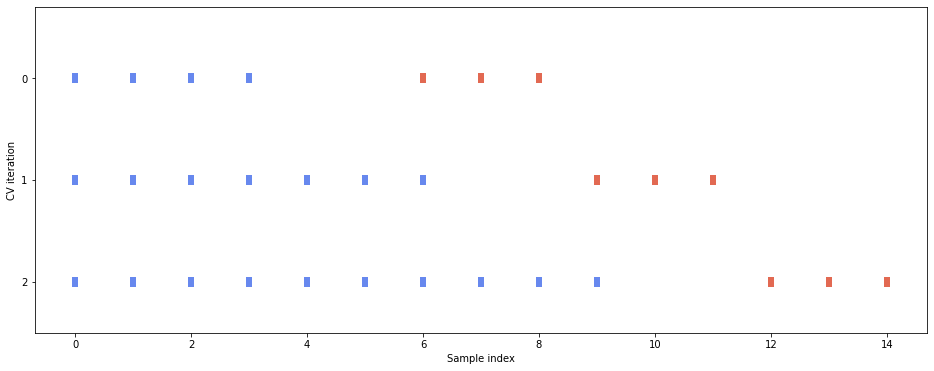

In [342]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
cv = ExpandingWindowSplitter(initial_window = 4,fh=[3,4,5], step_length=3)
plot_cv_indices(cv, y_longley)

# Прогнозы вперед

In [185]:
y_traffic.index

DatetimeIndex(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-07', '2015-11-08',
               '2015-11-09', '2015-11-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='report_dt', length=608, freq='D')

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

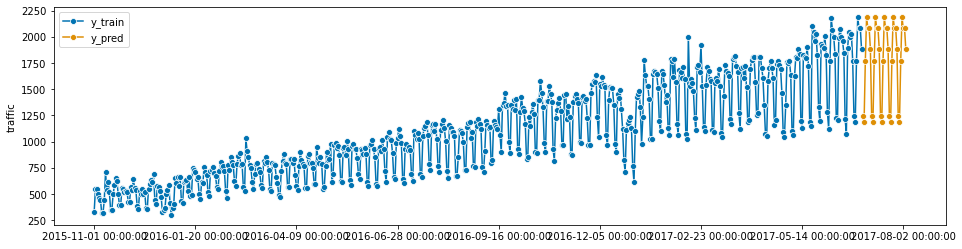

In [207]:
# Относительные горизонты прогнозирования
from sktime.forecasting.base import ForecastingHorizon
forecaster = NaiveForecaster(strategy="last",sp=7)
forecaster.fit(y_traffic)

forecast_length = 35
fh = ForecastingHorizon(list(range(1,forecast_length+1)), is_relative=True)
y_pred = forecaster.predict(fh)
plot_series(y_traffic, y_pred, labels=["y_train", "y_pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

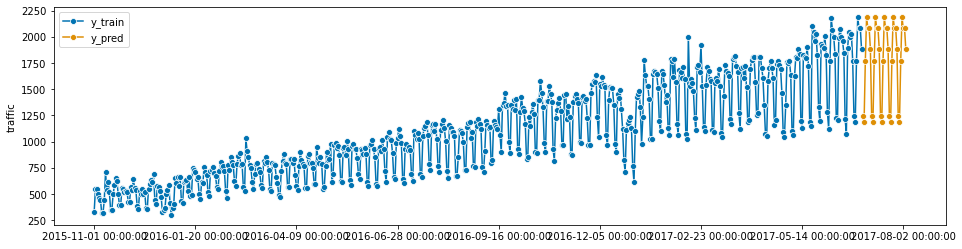

In [229]:
# Абсолютные горизонты прогнозирования
forecaster = NaiveForecaster(strategy="last",sp=7)
forecaster.fit(y_traffic)

dates = pd.date_range(start = y_traffic.index[-1], periods = forecast_length+1, freq='D')[1:]
fh = ForecastingHorizon(dates, is_relative=False, freq='D')
y_pred = forecaster.predict(fh)
plot_series(y_traffic, y_pred, labels=["y_train", "y_pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='traffic'>)

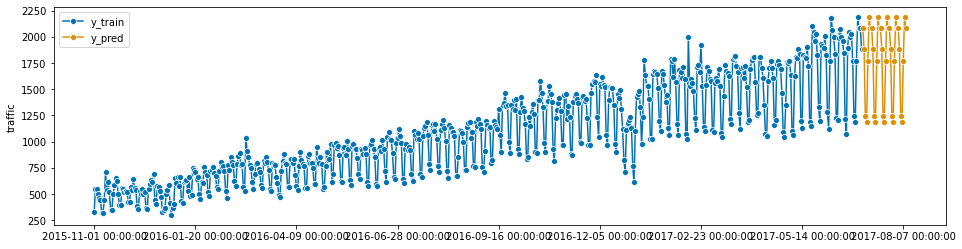

In [235]:
forecaster = NaiveForecaster(strategy="last",sp=7)
forecaster.fit(y_traffic)

dates = pd.date_range(start = pd.to_datetime('2017-07-05'), periods = forecast_length+1, freq='D')[1:]
fh = ForecastingHorizon(dates, is_relative=False, freq='D')
y_pred = forecaster.predict(fh)
plot_series(y_traffic, y_pred, labels=["y_train", "y_pred"])